<a href="https://colab.research.google.com/github/mudnighrs/Fraud_Detection/blob/main/Fraud_detection_PART1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df=pd.read_csv("/Users/lakshayasinghtanwar/Desktop/ESElab/financial.csv")
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


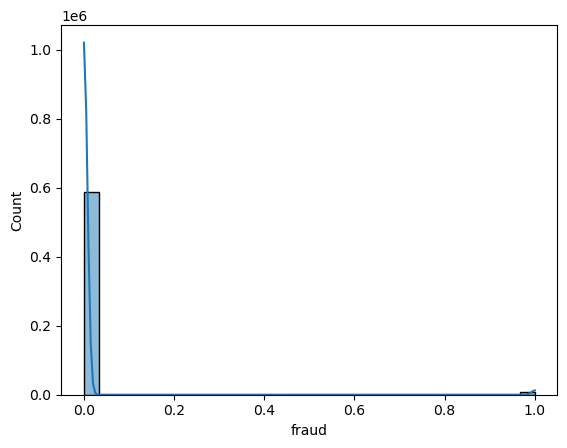

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['fraud'], bins=30, kde=True)
plt.show()


In [ ]:
missing_values = df.isna().sum().to_dict()
missing_values

{'step': 0,
 'customer': 0,
 'age': 0,
 'gender': 0,
 'zipcodeOri': 0,
 'merchant': 0,
 'zipMerchant': 0,
 'category': 0,
 'amount': 0,
 'fraud': 0}

In [ ]:
for label, content in df.items():
  if content.dtype=="object":
   print(label)

customer
age
gender
zipcodeOri
merchant
zipMerchant
category


In [ ]:
df_tmp = df.copy()
df_tmp

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [ ]:
for label, content in df_tmp.items():
  if content.dtype=="object":
   print(label)

customer
age
gender
zipcodeOri
merchant
zipMerchant
category


In [ ]:
for label, content in df_tmp.items():
    if content.dtype=="object":
      df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
for label, content in df_tmp.items():

 if not pd.api.types.is_numeric_dtype(content):
# Add binary column to inidicate whether sample had missing value
  df_tmp[label+"_is_missing"] = pd.isnull(content)
# We add the +1 because pandas encodes missing categories as -1
  df_tmp[label] = pd.Categorical(content).codes+1

In [ ]:
 df_tmp.dtypes.to_dict()


{'step': dtype('int64'),
 'customer': dtype('int16'),
 'age': dtype('int8'),
 'gender': dtype('int8'),
 'zipcodeOri': dtype('int8'),
 'merchant': dtype('int8'),
 'zipMerchant': dtype('int8'),
 'category': dtype('int8'),
 'amount': dtype('float64'),
 'fraud': dtype('int64'),
 'customer_is_missing': dtype('bool'),
 'age_is_missing': dtype('bool'),
 'gender_is_missing': dtype('bool'),
 'zipcodeOri_is_missing': dtype('bool'),
 'merchant_is_missing': dtype('bool'),
 'zipMerchant_is_missing': dtype('bool'),
 'category_is_missing': dtype('bool')}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y=df_tmp["fraud"]
X=df_tmp.drop("fraud",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train = pd.Series(y_train)
print("Class distribution after resampling:\n", y_train.value_counts())

Class distribution after resampling:
 fraud
0    469986
1    469986
Name: count, dtype: int64


In [ ]:

np.random.seed=42
from  sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier()

clf1.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
clf1.score(X_test,y_test)


0.9925249518620354

In [ ]:
#id3
np.random.seed=42

from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(criterion = "entropy")

clf2.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
print(clf2.score(X_test,y_test))

0.9917177475636725


In [ ]:

from sklearn.naive_bayes import GaussianNB
clf3 =GaussianNB()

clf3.fit(X_train,y_train)

GaussianNB()

In [ ]:
print(clf3.score(X_test,y_test))

0.9099378620857823


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
print(classifier.score(X_test,y_test))


0.9866811290770123


In [ ]:
import numpy as np
from scipy.stats import chi2, rankdata

def friedman_test(data):
    data = np.array(data)
    n, k = data.shape
    ranks = np.array([rankdata(-row, method='average') for row in data])
    rank_sums = ranks.sum(axis=0)
    chi_square_stat = (((12) / (n * k * (k + 1))) * np.sum(rank_sums ** 2)) - 3 * n * (k + 1)
    degrees_of_freedom = k - 1
    p_value = 1 - chi2.cdf(chi_square_stat, degrees_of_freedom)

    return chi_square_stat, p_value, degrees_of_freedom

data = [
    # rf                   #dt                #nb                  #knn
    [0.9170609563761117, 0.8397639139554168, 0.13357072012747345,0.579679040046827],
    [0.75, 0.785, 0.635,0.74],
    [0.9925165434839274, 0.991633663782593, 0.9095342599366009,0.9870258725794382]
]

chi_square_stat, p_value, degrees_of_freedom = friedman_test(data)

print(f"Friedman Chi-Square Statistic: {chi_square_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis.")


Friedman Chi-Square Statistic: 8.200000000000003
p-value: 0.0420541828949661
Degrees of Freedom: 3
Reject the null hypothesis


In [ ]:

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis


In [ ]:
import numpy as np
from scipy.stats import chi2, rankdata
from scipy.stats import norm

def friedman_test(data):
    """Performs the Friedman test on the given data."""
    data = np.array(data)
    n, k = data.shape
    ranks = np.array([rankdata(-row, method='average') for row in data])  # Rank the data
    rank_sums = ranks.sum(axis=0)


    chi_square_stat = ((12 / (n * k * (k + 1))) * np.sum(rank_sums ** 2)) - 3 * n * (k + 1)

    degrees_of_freedom = k - 1
    p_value = 1 - chi2.cdf(chi_square_stat, degrees_of_freedom)

    return chi_square_stat, p_value

def monte_carlo_power(n_samples=10, k_algorithms=4, effect_size=0.2, n_simulations=1000, alpha=0.05):
    """Estimates the power of the Friedman test using Monte Carlo simulation."""
    rejections = 0

    for _ in range(n_simulations):

        baseline = np.random.rand(n_samples, 1)
        differences = np.linspace(0, effect_size, k_algorithms)

        data = baseline + differences

        _, p_value = friedman_test(data)


        if p_value < alpha:
            rejections += 1


    power = rejections / n_simulations
    return power
alpha = 0.05

estimated_power = monte_carlo_power(n_samples=10, k_algorithms=4, effect_size=0.2, n_simulations=1000, alpha=0.05)
print(f"Estimated Power of the Friedman Test: {estimated_power:.4f}")
print(f"TYPE II error:{1-estimated_power}")
print(f"TYPE I error:{alpha}")


Estimated Power of the Friedman Test: 1.0000
TYPE II error:0.0
TYPE I error:0.05


In [ ]:
import math
from scipy import stats

def one_sample_t_test(data, population_mean):

    sample_mean = sum(data) / len(data)
    variance = sum((x - sample_mean) ** 2 for x in data) / (len(data) - 1)
    sample_std_dev = math.sqrt(variance)
    n = len(data)
    t_statistic = (sample_mean - population_mean) / (sample_std_dev / math.sqrt(n))
    df = n - 1
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))
    return t_statistic, p_value


data = df_tmp["amount"]
population_mean = 16.15
t_stat, p_val = one_sample_t_test(data, population_mean)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val <= 0.05:
    print("Reject the null hypothesis: Significant difference from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference from the population mean.")




T-statistic: 150.4853321057936
P-value: 0.0
Reject the null hypothesis: Significant difference from the population mean.


In [ ]:
import numpy as np

def t_test_two_sample(sample1, sample2):
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)
    std2 = np.std(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)
    t_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
    df = n1 + n2 - 2
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))
    return t_stat, p_value

x = df_tmp["amount"]
y =df_tmp["age"]
t_stat, p_value = t_test_two_sample(x, y)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_val <= 0.05:
    print("Reject the null hypothesis: Significant difference between the 2 means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the 2 means")

T-statistic: 234.4729, P-value: 0.0000
Reject the null hypothesis: Significant difference between the 2 means.


In [ ]:
import math
import numpy as np
from scipy import stats
data=pd.read_csv("/Users/lakshayasinghtanwar/Library/Mobile Documents/com~apple~Numbers/Documents/CBO2.csv")
def paired_t_test(x, y):
    differences = [x_i - y_i for x_i, y_i in zip(x, y)]
    n = len(differences)
    sum_d = sum(differences)
    sum_d_squared = sum(d**2 for d in differences)
    Sd = math.sqrt((sum_d_squared - (sum_d**2 / n)) / (n - 1))
    u1 = np.mean(x)
    u2 = np.mean(y)
    t_statistic = (u1 - u2) / (Sd / math.sqrt(n))
    p_value = 2 * stats.t.sf(abs(t_statistic), df=n-1)

    return t_statistic, p_value

x = df_tmp["amount"]
y = df_tmp['age']

t_statistic, p_value = paired_t_test(x, y)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value <= 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 234.4618
P-value: 0.0000
Reject the null hypothesis


In [ ]:
import numpy as np
from scipy.stats import chi2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
np.random.seed=42

def chi_square_test(observed):
    observed = np.array(observed)
    row_sums = observed.sum(axis=1)
    col_sums = observed.sum(axis=0)
    total = observed.sum()
    expected = np.outer(row_sums, col_sums) / total
    chi_square_statistic = ((observed - expected) ** 2 / expected).sum()
    df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
    p_value = 1 - chi2.cdf(chi_square_statistic, df)
    return chi_square_statistic, p_value



algorithm = DecisionTreeClassifier(criterion = "entropy")
algorithm.fit(X_train,y_train)
y_pred = algorithm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

observed_data = cm
chi_stat, p_val = chi_square_test(observed_data)
print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05
if p_val <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Confusion Matrix:
[[116745    712]
 [   249   1223]]
Chi-Square Statistic: 61788.3781
P-value: 0.0000
Reject the null hypothesis.


In [ ]:
import numpy as np
from scipy.stats import norm

def wilcoxon_signed_rank_test(x, y, alpha=0.05):

    differences = np.array(x) - np.array(y)
    non_zero_differences = differences[differences != 0]
    abs_differences = np.abs(non_zero_differences)
    ranks = np.argsort(np.argsort(abs_differences)) + 1
    positive_ranks = sum(ranks[non_zero_differences > 0])
    negative_ranks = sum(ranks[non_zero_differences < 0])
    Q = min(positive_ranks, negative_ranks)
    n = len(non_zero_differences)
    W1 = n * (n + 1) / 4
    W2 = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (Q - W1) / W2
    p_value = 2 * norm.cdf(z) if z < 0 else 2 * (1 - norm.cdf(z))
    return z, p_value


group1 = [0.9170609563761117,0.75, 0.9925165434839274] #rf
group2 = [ 0.8397639139554168, 0.785,0.991633663782593] #dt

z, p_value = wilcoxon_signed_rank_test(group1, group2)

print(f" Z Statistic for Wilcoxon Signed Rank test: {z}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis ")
else:
    print("Fail to reject the null hypothesis ")

 Z Statistic for Wilcoxon Signed Rank test: -0.5345224838248488
p-value: 0.5929800980174267
Fail to reject the null hypothesis 
